In [1]:
%matplotlib inline

import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import random_rotation, random_shear, random_shift, random_zoom
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
from os.path import join
from os import makedirs
import scipy.io as sio
import time
from numpy import savez_compressed, load


In [2]:
'''
    This function peforms various data augmentation techniques to the dataset
    
    @parameters:
        dataset: the feature training dataset in numpy array with shape [num_examples, num_rows, num_cols, num_channels] (since it is an image in numpy array)
        dataset_labels: the corresponding training labels of the feature training dataset in the same order, and numpy array with shape [num_examples, <anything>]
        augmentation_factor: how many times to perform augmentation.
        use_random_rotation: whether to use random rotation. default: true
        use_random_shift: whether to use random shift. default: true
        use_random_shear: whether to use random shear. default: true
        use_random_zoom: whether to use random zoom. default: true
        
    @returns:
        augmented_image: augmented dataset
        augmented_image_labels: labels corresponding to augmented dataset in order.
'''
def augment_data(dataset, dataset_labels, augementation_factor=1,
                 use_random_rotation=True, 
                 use_random_shear=True, 
                 use_random_shift=True, 
                 use_random_zoom=True):
	augmented_image = []
	augmented_image_labels = []

	for num in range (0, dataset.shape[0]):

		for i in range(0, augementation_factor):
			# original image:
			augmented_image.append(dataset[num])
			augmented_image_labels.append(dataset_labels[num])

			if use_random_rotation:
				augmented_image.append(random_rotation(dataset[num], 40, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_shear:
				augmented_image.append(random_shear(dataset[num], 0.3, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_shift:
				augmented_image.append(random_shift(dataset[num], 0.15, 0.15, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_zoom:
				augmented_image.append(random_zoom(dataset[num], (0.8, 0.8), row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

	return np.array(augmented_image), np.array(augmented_image_labels)

data_dir = 'svhn'
train_fn = 'train_32x32.mat'
test_fn = 'test_32x32.mat'
#  train_ex_fn = 'extra_32x32.mat'

In [3]:
start = time.time()

loaded = load('svhn_aug4.npz')
X_train = loaded['X_train']
X_test = loaded['X_test']
y_train = loaded['y_train']
y_test = loaded['y_test']

el = time.time() - start
print('Elapsed: {} s'.format(el))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Elapsed: 5.107149839401245 s
(439542, 32, 32, 3)
(26032, 32, 32, 3)
(439542, 10)
(26032, 10)


In [3]:
# train_data = sio.loadmat(join(data_dir, train_fn))
# # train_ex = sio.loadmat(join(data_dir, train_ex_fn))
# test_data = sio.loadmat(join(data_dir, test_fn))

# X_train = train_data['X']
# y_train = train_data['y']

# # X_extra = train_ex['X']
# # y_extra = train_ex['y']

# X_test = test_data['X']
# y_test = test_data['y']

# X_train = X_train.transpose(3, 0, 1, 2)
# # X_extra = X_extra.transpose(3, 0, 1, 2)
# # X_train = np.concatenate((X_train, X_extra))
# X_test = X_test.transpose(3, 0, 1, 2)

# # y_train = np.concatenate((y_train, y_extra))
# y_train = y_train.reshape(y_train.shape[0])
# y_test = y_test.reshape(y_test.shape[0])

# y_train[y_train == 10] = 0
# y_test[y_test == 10] = 0

# print(X_train.shape)
# print(y_train.shape)

# X_train, y_train = augment_data(X_train, y_train, augementation_factor=2, 
#                                 use_random_shift=False, use_random_shear=False)
# print(X_train.shape)
# print(y_train.shape)

# #one-hot encode target column
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# print(y_train.shape)
# print(y_test.shape)

# savez_compressed('svhn_aug4.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

(73257, 32, 32, 3)
(73257,)
(439542, 32, 32, 3)
(439542,)
(439542, 10)
(26032, 10)


Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

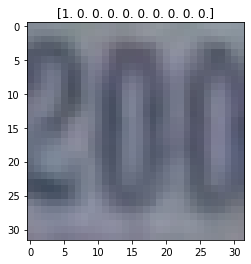

In [4]:
i = 304005
t = str(y_train[i])
plt.imshow(X_train[i])
plt.title(t)

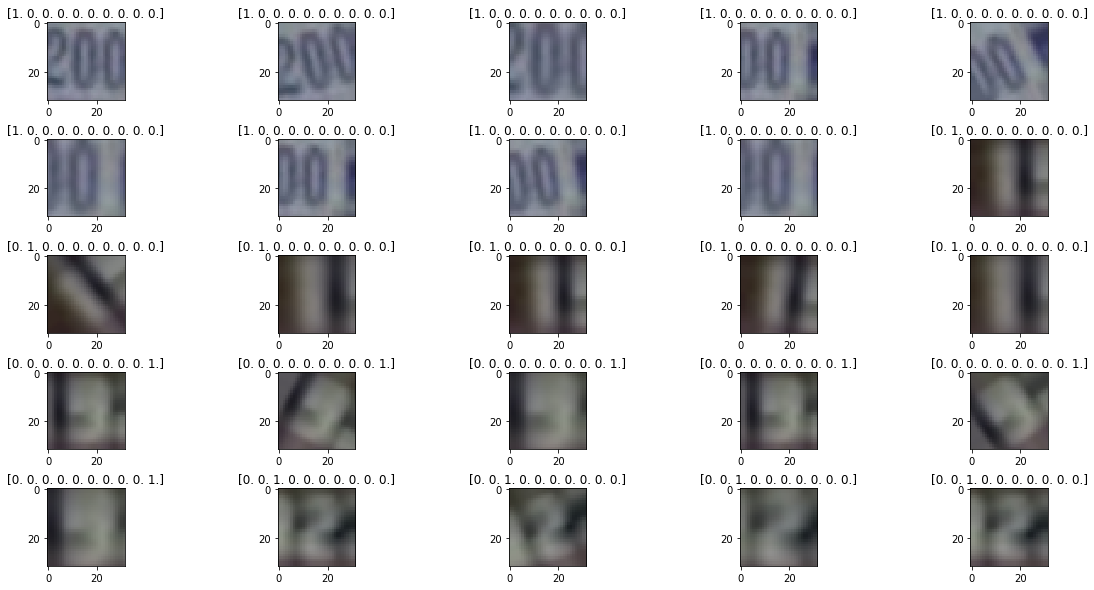

In [5]:
r, c = 5, 5
start = 304005
# Magic line for adequate graph size
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(nrows=r, ncols=c)
fig.subplots_adjust(hspace=0.5)

for ax, img, label in zip(axes.flatten(), X_train[start:start+r*c], y_train[start:start + r*c]):
    ax.imshow(img)
    ax.set(title = str(label))

In [6]:
from tensorflow.keras.layers import Activation
model = 0
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(1, 1), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(1, 1), activation='relu', padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________

In [7]:
# Define Callbacks
filepath = "svhn-best_19.03.2020.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1,
                             save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=30)
csv_history = 'svhn-history_19.03.2020.csv'
csv_logger = CSVLogger(csv_history, append=False)

callbacks = [checkpoint, early_stop, csv_logger]

In [8]:
model.fit(X_train, y_train, batch_size=2048,
          validation_data=(X_test, y_test),
          epochs=350, verbose=1,
          callbacks=callbacks)

Train on 439542 samples, validate on 26032 samples
Epoch 1/350
438272/439542 [============================>.] - ETA: 0s - loss: 1.1625 - acc: 0.6009
Epoch 00001: val_acc improved from -inf to 0.83831, saving model to svhn-best_19.03.2020.h5
439542/439542 [==============================] - 50s 113us/sample - loss: 1.1609 - acc: 0.6015 - val_loss: 0.5494 - val_acc: 0.8383
Epoch 2/350
438272/439542 [============================>.] - ETA: 0s - loss: 0.4809 - acc: 0.8481
Epoch 00002: val_acc improved from 0.83831 to 0.91703, saving model to svhn-best_19.03.2020.h5
439542/439542 [==============================] - 37s 84us/sample - loss: 0.4807 - acc: 0.8482 - val_loss: 0.2823 - val_acc: 0.9170
Epoch 3/350
438272/439542 [============================>.] - ETA: 0s - loss: 0.3886 - acc: 0.8786
Epoch 00003: val_acc improved from 0.91703 to 0.92340, saving model to svhn-best_19.03.2020.h5
439542/439542 [==============================] - 36s 82us/sample - loss: 0.3884 - acc: 0.8786 - val_loss: 0.25

KeyboardInterrupt: 

In [8]:
model.save('svhn-final_17.03.2020.h5')